### Student Information
Name:孫瑜雅

Student ID:109070006

GitHub ID:Sunyasun

Kaggle name:njpm6u83

Kaggle private scoreboard snapshot: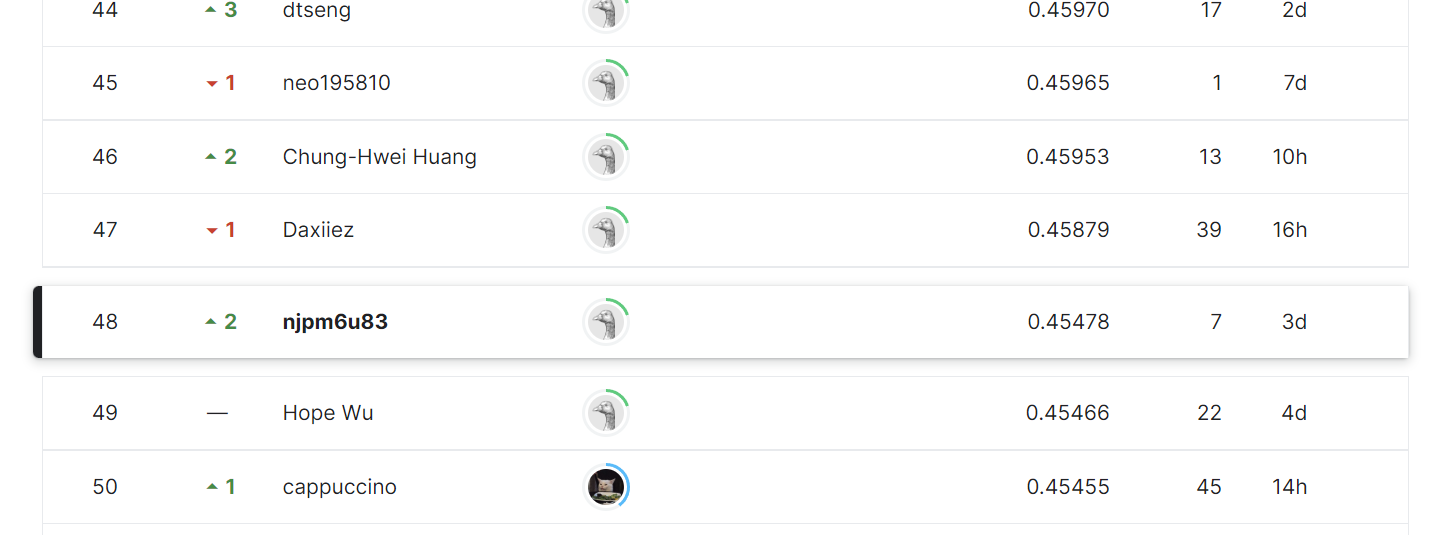

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [1]:
### Begin Assignment Here

# PART 1

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
# Answer here
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

train_df_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(train_df_counts[0])

  (0, 3942)	1
  (0, 6623)	1
  (0, 1888)	1
  (0, 8318)	1
  (0, 9296)	1
  (0, 7713)	1
  (0, 5227)	1
  (0, 3280)	1
  (0, 4210)	1
  (0, 5721)	1
  (0, 3654)	1
  (0, 1623)	1
  (0, 7840)	1
  (0, 4005)	1
  (0, 4948)	1


In [9]:
analyze = count_vect.build_analyzer()
analyze(train_df.text[0])

['how',
 'the',
 'fu',
 'who',
 'the',
 'heck',
 'moved',
 'my',
 'fridge',
 'should',
 'knock',
 'the',
 'landlord',
 'door',
 'angry',
 'mad']

In [10]:
train_df_counts.shape

(3613, 10115)

In [11]:
term_frequencies = []
for j in range(0,train_df_counts.shape[1]):
    term_frequencies.append(sum(train_df_counts[:,j].toarray()))

In [15]:
import plotly_express as px

temp = [(i, v) for i, v in zip(count_vect.get_feature_names_out()[:30], term_frequencies[:30])]
temp = sorted(temp, key=lambda x: x[1], reverse=True)

D2 = {}
D2['terms'] = [i[0] for i in temp[:]]
D2['frequencies'] = [i[1] for i in temp[:]]

df2 = pd.DataFrame(D2)

fig = px.line(df2, x = 'terms', y = 'frequencies', height=500)
fig.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [31]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000)
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_1000 = TFIDF_1000.transform(train_df['text'])
train_data_TFIDF_1000.shape

(3613, 1000)

In [32]:
feature_names_1000 = TFIDF_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
在左上到右下斜對角的數值皆為正確預測，而其他皆為a單詞被判定為其他單詞的錯誤預測。
而這四者的準確率（precision）相差不多。
但其在training data的score和testing data的score差距明顯，我想可能是有overfitting的狀況出現。

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [40]:
# Answer here

from sklearn.naive_bayes import MultinomialNB
## build Naive Bayes model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'sadness', 'joy', 'anger', 'joy', 'anger',
       'fear', 'joy', 'anger'], dtype='<U7')

In [41]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [42]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


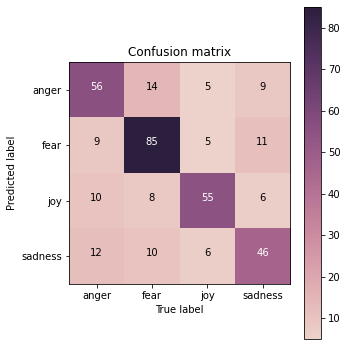

In [44]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
比較naive bayes與randomforest的結果發現，雖然naive bayes在training data的分數比較低，但其在testing data的分數較高，且兩個相差差距較小。
我猜可能是randomforest在預測上容易出現overfitting的狀況，才會有這樣的結果。

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

# Answer here
從圖表可以看出這是一個overfitting的模型。
首先，當train accuracy上升時，val accuracy不升反降，loss也呈現相反的趨勢，可見其對於訓練集十分擬和，但卻不擅於處理未見過之資料。
這都是overfitting時典型的特徵。

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here
First, we can use tokenization to split the words. Then, we try word2vec to train the model. By using word2vec, the model can get the relationship between the words and hence train the model.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [71]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

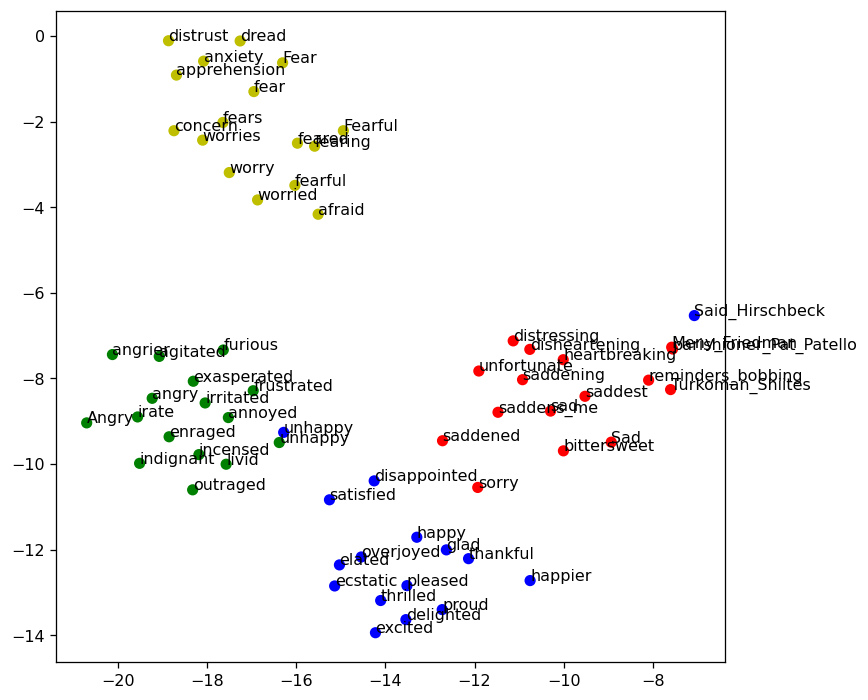

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# 

# PART 3

kaggle比賽的部分我嘗試了兩個model-logistic regression 和 MultinomialNB。分別得到了0.45119和0.44464的成績，於是我去修改了logistic regression的c值，讓他有更強的正規化，也將準確率提升至0.45478。
而在整份比賽中，我第一次嘗試了json檔的讀取，也對資料預處理有了實際的操作；建構model的時候，為了讓排名提升，我學習去了解那些參數，然後嘗試從參數中優化模型，為了瞭解參數背後的邏輯也看了一些資料、學到了不少和統計相關的背景知識，很有趣，也讓我對data mining有了更多的認識！


In [119]:
# load data
import pandas as pd

### training data
data_identification = pd.read_csv("C:/Users/user/Desktop/大三上/資料探勘與應用/dm2022-isa5810-lab2-homework/data_identification.csv")
emotion = pd.read_csv("C:/Users/user/Desktop/大三上/資料探勘與應用/dm2022-isa5810-lab2-homework/emotion.csv")
submit = pd.read_csv("C:/Users/user/Desktop/大三上/資料探勘與應用/dm2022-isa5810-lab2-homework/sampleSubmission.csv")

In [120]:
# load json
import json
from pandas import json_normalize

file=open('C:/Users/user/Desktop/大三上/資料探勘與應用/dm2022-isa5810-lab2-homework/tweets_DM.json',encoding='utf-8')
tweet_data=[]
for line in file.readlines():
    dic=json.loads(line)
    tweet_data.append(dic)

In [121]:
tweet_data

[{'_score': 391,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['Snapchat'],
    'tweet_id': '0x376b20',
    'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
  '_crawldate': '2015-05-23 11:42:47',
  '_type': 'tweets'},
 {'_score': 433,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
    'tweet_id': '0x2d5350',
    'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
  '_crawldate': '2016-01-28 04:52:09',
  '_type': 'tweets'},
 {'_score': 232,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['bibleverse'],
    'tweet_id': '0x28b412',
    'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'}},
  '_crawldate': '2017-12-25 04:39:20',
  '_type': 'tweets'},
 {'_score': 376,
  '_index': 'hashtag_

In [122]:
context=pd.json_normalize(tweet_data)

In [123]:
context.head()

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [124]:
context.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 7 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   _score                  int64 
 1   _index                  object
 2   _crawldate              object
 3   _type                   object
 4   _source.tweet.hashtags  object
 5   _source.tweet.tweet_id  object
 6   _source.tweet.text      object
dtypes: int64(1), object(6)
memory usage: 99.7+ MB


In [125]:
# rename the columns
context=context.rename(columns={'_source.tweet.tweet_id':'tweet_id','_source.tweet.hashtags':'hashtags','_source.tweet.text':'text'})

In [126]:
groups = data_identification.groupby(data_identification.identification)
train_df = groups.get_group("train")
test_df=groups.get_group("test")

In [127]:
train_df.head()

,tweet_id,identification
1,0x29e452,train
2,0x2b3819,train
4,0x2a2acc,train
5,0x2a8830,train
6,0x20b21d,train


In [128]:
test_df.head()

,tweet_id,identification
0,0x28cc61,test
3,0x2db41f,test
15,0x2466f6,test
23,0x23f9e9,test
31,0x1fb4e1,test


In [129]:
# merge test data
test_df=pd.merge(left=test_df,right=context,on="tweet_id")

In [130]:
test_df.head()

,tweet_id,identification,_score,_index,_crawldate,_type,hashtags,text
0,0x28cc61,test,107,hashtag_tweets,2017-01-17 14:13:32,tweets,[],@Habbo I've seen two separate colours of the e...
1,0x2db41f,test,728,hashtag_tweets,2015-10-17 06:46:20,tweets,[],@FoxNews @KellyannePolls No serious self respe...
2,0x2466f6,test,491,hashtag_tweets,2016-12-19 03:50:27,tweets,[womendrivers],"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,test,28,hashtag_tweets,2017-04-09 19:32:19,tweets,[robbingmembers],@cineworld “only the brave” just out and fount...
4,0x1fb4e1,test,925,hashtag_tweets,2016-01-15 11:59:31,tweets,[],Felt like total dog 💩 going into open gym and ...


In [131]:
# merge training data
train_df=pd.merge(left=train_df,right=emotion,on="tweet_id")

In [132]:
train_df=pd.merge(left=train_df,right=context,on="tweet_id")

In [133]:
train_df.head()

,tweet_id,identification,emotion,_score,_index,_crawldate,_type,hashtags,text
0,0x29e452,train,joy,809,hashtag_tweets,2015-01-17 03:07:03,tweets,[],Huge Respect🖒 @JohnnyVegasReal talking about l...
1,0x2b3819,train,joy,808,hashtag_tweets,2016-07-02 09:34:06,tweets,"[spateradio, app]",Yoooo we hit all our monthly goals with the ne...
2,0x2a2acc,train,trust,16,hashtag_tweets,2016-08-15 18:18:39,tweets,[],@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
3,0x2a8830,train,joy,768,hashtag_tweets,2017-02-11 08:49:46,tweets,"[PUBG, GamersUnite, twitch, BeHealthy, StayPos...",Come join @ambushman27 on #PUBG while he striv...
4,0x20b21d,train,anticipation,70,hashtag_tweets,2016-11-23 05:37:10,tweets,"[strength, bones, God]",@fanshixieen2014 Blessings!My #strength little...


In [134]:
# count the amounts of emotion
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

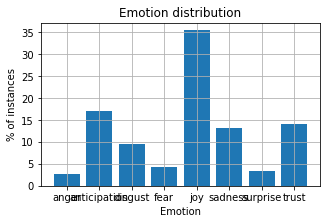

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [136]:
#clean the texts

import re
from string import punctuation

def preprocess_text(text):
    text = text.lower()  #  lowercase text
    
    # remove punctuation, extra spaces, tabs, and new lines
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  
    text = " ".join(text.split())
    
    return text

train_df['text'] = train_df['text'].map(preprocess_text)
test_df['text'] = test_df['text'].map(preprocess_text)

In [137]:
train_df.head()

,tweet_id,identification,emotion,_score,_index,_crawldate,_type,hashtags,text
0,0x29e452,train,joy,809,hashtag_tweets,2015-01-17 03:07:03,tweets,[],huge respect🖒 johnnyvegasreal talking about lo...
1,0x2b3819,train,joy,808,hashtag_tweets,2016-07-02 09:34:06,tweets,"[spateradio, app]",yoooo we hit all our monthly goals with the ne...
2,0x2a2acc,train,trust,16,hashtag_tweets,2016-08-15 18:18:39,tweets,[],kidsnts picubch uhbcomms bwchboss well done te...
3,0x2a8830,train,joy,768,hashtag_tweets,2017-02-11 08:49:46,tweets,"[PUBG, GamersUnite, twitch, BeHealthy, StayPos...",come join ambushman27 on pubg while he strives...
4,0x20b21d,train,anticipation,70,hashtag_tweets,2016-11-23 05:37:10,tweets,"[strength, bones, God]",fanshixieen2014 blessingsmy strength little my...


In [138]:
# remove some features
train_df = train_df.drop(['identification'], axis=1)
train_df = train_df.drop(['_score'], axis=1)
train_df = train_df.drop(['_index'], axis=1)
train_df = train_df.drop(['_crawldate'], axis=1)
train_df = train_df.drop(['_type'], axis=1)
train_df = train_df.drop(['hashtags'], axis=1)

test_df = test_df.drop(['identification'], axis=1)
test_df = test_df.drop(['_score'], axis=1)
test_df = test_df.drop(['_index'], axis=1)
test_df = test_df.drop(['_crawldate'], axis=1)
test_df = test_df.drop(['_type'], axis=1)
test_df = test_df.drop(['hashtags'], axis=1)

In [139]:
# save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [140]:
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create a function for the tweet tokenizer from NLTK
def tknzr(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

vectorizer = TfidfVectorizer(min_df=20, max_df=0.95, ngram_range=(1,1), stop_words='english', tokenizer=tknzr).fit(train_df['text'])
tfidf_transformed = vectorizer.transform(train_df['text'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_transformed, train_df['emotion'], test_size=0.2, random_state=1)

In [142]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1164450, 31705)
y_train.shape:  (1164450,)
X_test.shape:  (291113, 31705)
y_test.shape:  (291113,)


In [143]:
# build logisticRegression model
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(solver='liblinear', C=1, n_jobs=-1, max_iter=1000, tol=0.0001, verbose=2, random_state=1)

LR_model.fit(X_train,y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[LibLinear]

In [144]:
# precision, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.22      0.32      8048
anticipation       0.60      0.53      0.56     49631
     disgust       0.48      0.38      0.42     27840
        fear       0.70      0.37      0.48     12863
         joy       0.54      0.82      0.65    103243
     sadness       0.51      0.47      0.49     38640
    surprise       0.64      0.20      0.30      9892
       trust       0.56      0.30      0.39     40956

    accuracy                           0.55    291113
   macro avg       0.58      0.41      0.45    291113
weighted avg       0.56      0.55      0.53    291113



In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes)) 
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

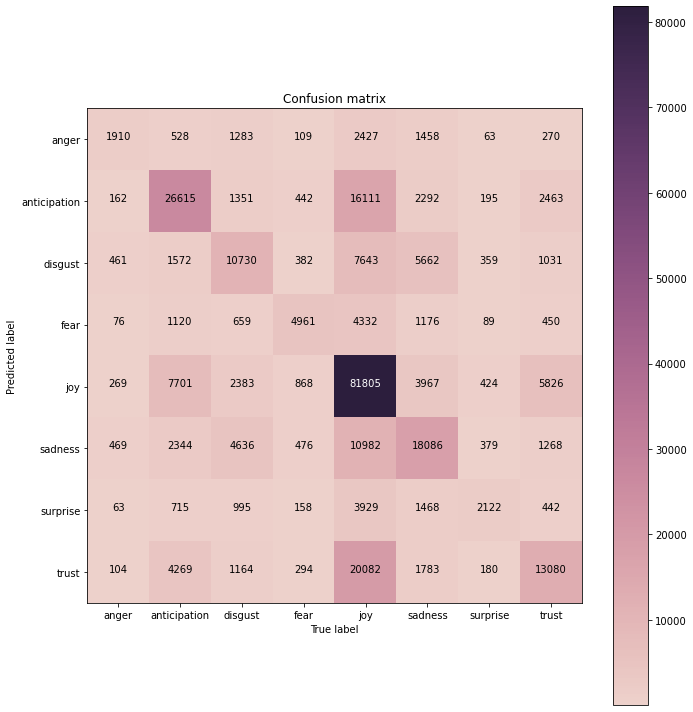

In [52]:
# visiualize the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

my_tags = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust',
       'disgust', 'surprise']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [145]:
X_train = vectorizer.transform(train_df['text'])
y_train = train_df['emotion']
X_test = vectorizer.transform(test_df['text'])

In [146]:
# training, predict, and save
LR_model = LR_model.fit(X_train, y_train)

prediction = LR_model.predict(X_test)

test_df['emotion'] = prediction
output = test_df[['tweet_id', 'emotion']].copy()
output = output.set_axis(["id", "emotion"], axis=1)
output.to_csv("tfidf-logistic-regression.csv", index=False)
test_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[LibLinear]

,tweet_id,text,emotion
0,0x28cc61,habbo ive seen two separate colours of the ele...,joy
1,0x2db41f,foxnews kellyannepolls no serious self respect...,sadness
2,0x2466f6,looking for a new car and it says 1 lady owner...,joy
3,0x23f9e9,cineworld “only the brave” just out and founta...,joy
4,0x1fb4e1,felt like total dog 💩 going into open gym and ...,disgust
...,...,...,...
411967,0x2c4dc2,6 year old walks in astounded mum look how ben...,joy
411968,0x31be7c,only one week to go until the inspiringvolunte...,joy
411969,0x1ca58e,i just got caught up with the manga for my her...,anticipation
411970,0x35c8ba,speak only when spoken to and make hot ass mus...,joy


In [55]:
# build MultinomialNB model

from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()

NB_model = NB_model.fit(X_train, y_train)
\
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [57]:
# training
NB_model = NB_model.fit(X_train, y_train)
prediction = NB_model.predict(X_test)

,tweet_id,text,emotion
0,0x28cc61,habbo ive seen two separate colours of the ele...,joy
1,0x2db41f,foxnews kellyannepolls no serious self respect...,sadness
2,0x2466f6,looking for a new car and it says 1 lady owner...,joy
3,0x23f9e9,cineworld “only the brave” just out and founta...,joy
4,0x1fb4e1,felt like total dog 💩 going into open gym and ...,joy
...,...,...,...
411967,0x2c4dc2,6 year old walks in astounded mum look how ben...,joy
411968,0x31be7c,only one week to go until the inspiringvolunte...,joy
411969,0x1ca58e,i just got caught up with the manga for my her...,anticipation
411970,0x35c8ba,speak only when spoken to and make hot ass mus...,joy


In [ ]:
# save
test_df['emotion'] = prediction
output = test_df[['tweet_id', 'emotion']].copy()
output = output.set_axis(["id", "emotion"], axis=1)
output.to_csv("tfidf-naive-bayes.csv", index=False)
test_df